<a href="https://colab.research.google.com/github/jinzhouyang666/Interactive-Visual-Bias-Analysis-Prototype/blob/main/Interactive_Visual_Bias_Analysis_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Interactive Visual Bias Analysis Prototype

This notebook presents a research prototype that explores how human feedback can guide AI systems in understanding representational bias in cultural heritage collections. The project simulates user-model interaction mechanisms inspired by **RLHF (Reinforcement Learning from Human Feedback)** and **DPO (Direct Preference Optimization)**.

Instead of relying on static annotations or labels, this work focuses on **subjective pairwise preferences** to capture nuanced interpretations of bias. The goal is to model **how different observers may prioritize or perceive bias differently**, and how AI systems might adapt to such preferences.

### 🖼️ Dataset Overview

The dataset includes five historical images retrieved from the **Rijksmuseum** using socially sensitive keywords (e.g., "colonial", "Asian woman", "Black servant"). For each image, we collect and compare:

- The original Dutch-language institutional description.
- Machine-generated captions via **Encord** (vision annotation) and **LLaMA-4** (language model).
- Subjective human feedback simulating two different perspectives
- A structured **bias divergence analysis** comparing what AI missed vs what humans noticed.
- A **pairwise preference ranking**, forming the foundation for feedback-based model tuning.

### 🧭 Project Goal

This prototype does illustrates:
- How cultural, racial, and gender representation issues are often overlooked by AI models.
- How human preference signals can be structured to train models that better align with ethical and interpretive nuance.
- How this methodology supports the design of interactive, personalized AI systems not just for cultural heritage analysis but support the further research of this PhD program.


In [1]:
!pip install transformers torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration


# ✅ STEP 1: Load image metadata
This section defines 5 cultural heritage images from the Rijksmuseum, including their Dutch titles and descriptions. These images were selected to reflect themes such as colonialism, orientalism, race, and class.

## 🖼️ Image 1: Colonial — Studioportret van een jonge Javaanse vrouw

**Search keyword used:** `colonial`

**Title:** Studioportret van een jonge Javaanse vrouw in een sarong met batik motief  
**Object number:** RP-F-2001-17-67  
**Photographer:** Kassian Céphas (Java, possibly)  
**Date:** ca. 1867 – ca. 1910  
**Object type:** Photograph  
**Material & Technique:** Albumen print on pasteboard, paper, photographic support  
**Dimensions:** 220 mm × 160 mm  
**Credit line:** Gift of J.H. Marmelstein  
**Rights:** Public domain  
**Persistent URL:** [https://id.rijksmuseum.nl/200492689](https://id.rijksmuseum.nl/200492689)

**Official description (Dutch):**  
Studioportret van een jonge Javaanse vrouw in een sarong met batik motief. De vrouw draagt sieraden en is zichtbaar van haar hoofd tot haar middel.


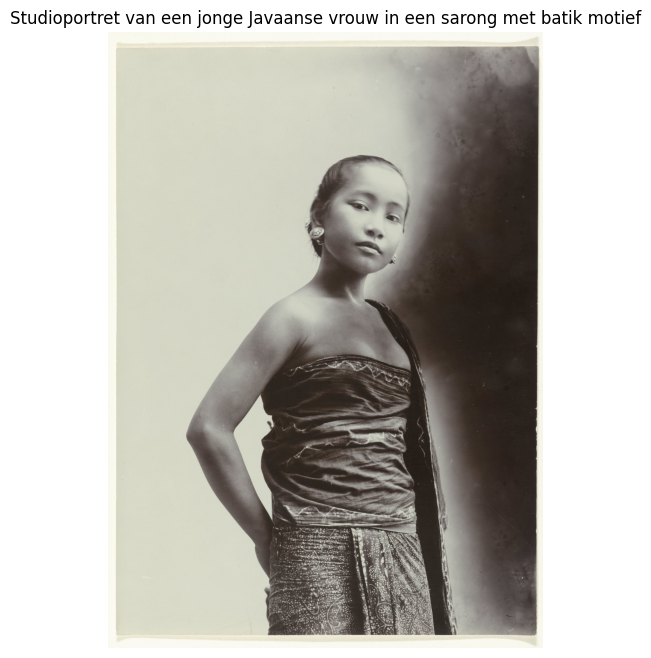

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the uploaded image (Image 1)
img_path = "/content/1 RP-F-2001-17-67.jpg"
img = Image.open(img_path)

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Studioportret van een jonge Javaanse vrouw in een sarong met batik motief", fontsize=12)
plt.show()

## 🖼️ Image 2: Nodding Head Figure

- **Search keyword used:** "asian woman"
- **Object type:** Doll (knikpop)
- **Object number:** NG-878-A
- **Title (Dutch):** Nodding head figure
- **Description (Dutch):**
  > Staande pop, voorstellend man met staf in de linkerhand. Hij draagt een lang groen gewaad, rijkelijk versierd met bloemmotieven en Chinese dierpatronen. Kaal hoofd met lange bakkebaarden, sik en een lange snor. Donkerblauw mutsje op het hoofd - waaraan een lange ijzeren staaf met loden gewicht, zodat het hoofd op en neer kan knikken - staat los in de kraag. Opschrift; binnen in de kraag: Chinese tekens.

- **Maker:** Anonymous (possibly China)
- **Dating:** 1804 - 1808
- **Source:** Rijksmuseum
- **Dimensions:** 74.5 x 35 x 26.5 cm, 16.1 kg
- **Related Themes:** Orientalism, representation, objectification
- **Related texts:**
  - Jan van Campen, *Chinese 'Schuddebolle'*, Aziatische Kunst 37 (2007)
  - *Silk Thread: China and the Netherlands from 1600*
- **🔗 Persistent URL:** [https://id.rijksmuseum.nl/20058152](https://id.rijksmuseum.nl/20058152)


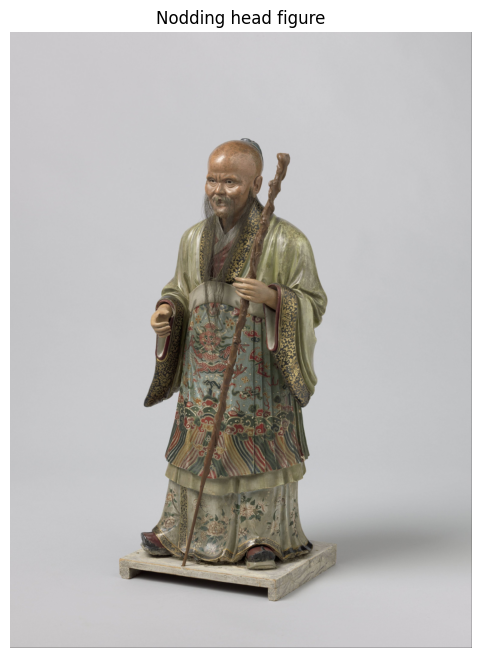

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the uploaded image (Image 2)
img_path = "/content/2 NG-878-A.jpg"
img = Image.open(img_path)

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Nodding head figure", fontsize=12)
plt.show()

### 🖼️ Image 3: The Dollhouse of Petronella Oortman

- **Search tag used**: `black servant`
- **Title**: *The Dollhouse of Petronella Oortman (1655/56–1716)*
- **Object number**: SK-A-4245
- **Object type**: Painting
- **Painter**: Jacob Appel (I)
- **Date**: c. 1710
- **Description**: Het poppenhuis van Petronella Oortman.
- **Material**: Oil on parchment on canvas
- **Dimensions**: 99 × 81.2 cm
- **Associated themes**: Domesticity, class, race (presence of a Black servant)
- **Persistent URL**: [Rijksmuseum Collection Page](https://id.rijksmuseum.nl/200108136)



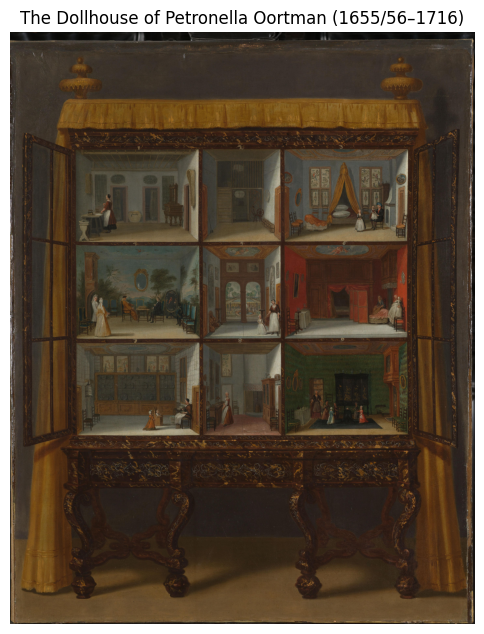

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the uploaded image (Image 3)
img_path = "/content/3 SK-A-4245.jpg"
img = Image.open(img_path)

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.title("The Dollhouse of Petronella Oortman (1655/56–1716)", fontsize=12)
plt.show()


## 🖼️ Image 4: Noble Family Representation — Portrait of Lysbeth van Duvenvoirde

**Search Keyword Used:** "noble family portrait"
**Source:** Rijksmuseum, Public Domain  
**Persistent URL:** https://id.rijksmuseum.nl/200107796

**Object Title:**  
Portrait of Lysbeth van Duvenvoirde (?-1472)

**Object Type:**  
- Painting  
- Diptych

**Creation:**  
- Artist: Anonymous, possibly Cologne  
- Date: circa 1430  
- Made in: North Rhine-Westphalia

**Materials and Techniques:**  
- Medium: Oil paint on parchment  
- Dimensions: 32 × 20 cm (frame 42 × 29.3 × 5.9 cm)

**Description:**  
Portret van Lysbeth van Duvenvoorde (gest. 1472). Staande, tot de enkels, naar rechts. In de linkerhand een banderol met inscriptie. Linksboven het familiewapen. Onderdeel van een tweeluik, de verblijfplaats van de rechtervleugel met het portret van haar echtgenoot (in 1430) Symon van Adrichem is onbekend.

**Associated Subjects:**  
- Gender  
- Nobility  
- Historical identity  
- Coat of arms  
- Class representation

**Credit Line:**  
On loan from the Koninklijk Kabinet van Schilderijen Mauritshuis


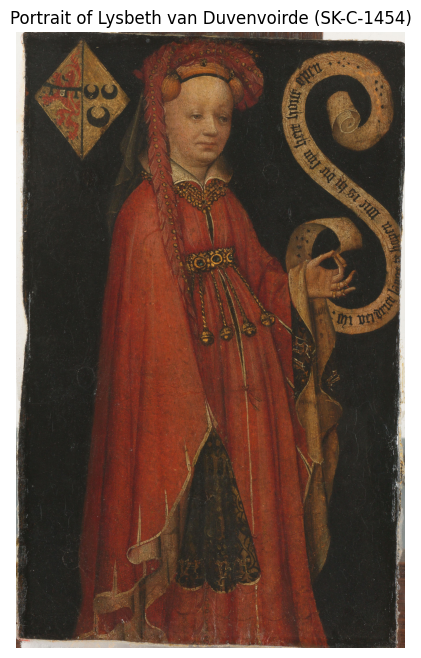

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the uploaded image (Image 4)
img_path = "/content/4 SK-C-1454.jpg"
img = Image.open(img_path)

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Portrait of Lysbeth van Duvenvoirde (SK-C-1454)", fontsize=12)
plt.show()


### 🖼️ Image 5: Bandontwerp voor: Claude Francolin, Paul Gauguin. Het leven van een groot schilder

**Source:** Rijksmuseum  
**Object number:** RP-T-2015-41-3540  
**Search tag used:** "exotic portrait"

**Original Dutch Title:**  
Bandontwerp voor: Claude Francolin, Paul Gauguin. Het leven van een groot schilder, c. 1958

**Original Description (Dutch):**  
Portret van de schilder Paul Gauguin met in de achtergrond één van zijn schilderijen van jonge vrouwen in een Tahitiaans landschap.

**Material & Technique:**  
Penseel in kleuren over potlood (brush over pencil) on paper

**Date:** In or after 1958  
**Made by:** Anonymous (draughtsman)  
**Dimensions:** Height 185 mm × Width 174 mm  

**Subjects:**  
- Paul Gauguin  
- Exotic landscapes  
- Artist portrait  
- Tahiti and colonial vision

**Persistent URL:**  
[https://id.rijksmuseum.nl/200698340](https://id.rijksmuseum.nl/200698340)


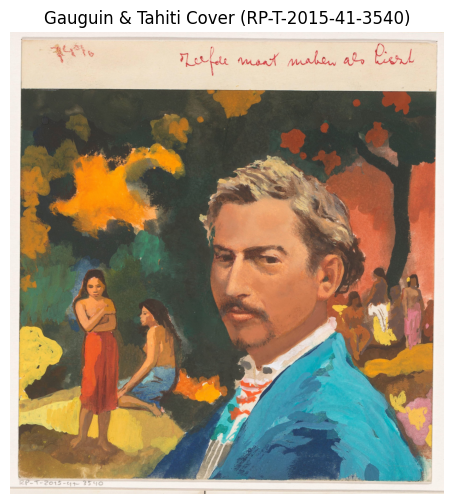

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display Image 5: Paul Gauguin exotic portrait
img_path = "/content/5 RP-T-2015-41-3540.jpg"
img = Image.open(img_path)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Gauguin & Tahiti Cover (RP-T-2015-41-3540)", fontsize=12)
plt.show()


## Step 2: Multi-Source Annotation Comparison

This compares three distinct types of descriptions for each image:

- **Human Feedback**: Subjective interpretations provided by a human observer. These include emotional, social, or cultural reflections that are visible in the image.
- **Annotation A (Encord)**: Visual annotation generated using a tool focused on detecting physical features and objects in the image. The output is descriptive and objective.
- **Annotation B (LLaMA-4)**: Language model-generated description (Meta LLaMA-4, Maverick variant), based on the same instruction as the human annotation: Describe the image content in 2–3 sentences.

The goal of this comparison is to:
- Examine how different tools/systems interpret the same image.
- Highlight where and how **human subjectivity introduces cultural or ethical observations** that AI currently does not express.
- Understand the **limits of static AI outputs** and motivate the need for **interactive learning systems**, where AI can adapt to human feedback and context.
- Reveal **semantic or representational mismatches**, especially when image metadata or search queries return unexpected results (e.g., male statue under "Asian woman").

### Method Summary

- Encord was used as an object-level annotation tool, providing structured visual observations.
- Meta’s LLaMA-4 was prompted with identical instructions as the human.
- Human feedback was collected by the researcher from the other person being completely unaware of the purpose and context of the study.
- All text sources are presented side-by-side to identify convergences, divergences, and interpretive gaps.

This comparison enables future steps toward designing a system that learns **not from a universal label**, but from **contextual, subjective feedback**.


In [45]:
# Example descriptions from 3 sources
annotation_a = {
    "img1": "The picture shows a person wearing a traditional outfit that looks like a wraparound top and a long skirt with intricate patterns. The individual is standing gracefully, with one arm behind their back, and wearing a large earring.",
    "img2": "The image presents a meticulously crafted statue of a man dressed in traditional attire, standing on a small wooden platform. The statue is characterized by its intricate details, with the man wearing a long robe adorned with elaborate patterns that suggest a rich cultural or historical significance.",
    "img3": "This picture shows a large dollhouse with many rooms, and tiny people are inside the rooms doing things like talking, sitting, or working. The dollhouse is on a fancy table and looks like it is part of a rich, old house.",
    "img4": "A person dressed in a long, flowing red robe stands with an ornate design that includes golden embroidery and patterned fabric. Near the person, a scroll with writing wraps around.",
    "img5": "Man in a bright blue coat stares ahead, his light hair and neat mustache clearly visible. In the background, two barefoot women and other faint figures appear amid bold orange, green, and dark tree shapes."
}

annotation_b = {
    "img1": "The picture shows a young woman standing and looking at the camera with a calm and confident expression. She is wearing traditional clothing with detailed patterns and has large earrings in her ears.",
    "img2": "The picture shows a statue of an old man with a long beard wearing colorful, fancy robes and holding a walking stick. The statue stands on a small square base and looks like it might represent a wise person or elder from Asian culture.",
    "img3": "The picture shows a detailed dollhouse with many rooms, where tiny figures of people, including a maid, are doing things like talking, sitting, or working. The dollhouse sits on a lovely table, looking like a small, active world full of different stories.",
    "img4": "A young woman in a rich red gown stands calmly, wearing gold beads and a tall headpiece. She holds a curled scroll with dark writing, while a small shield shape with moon symbols hangs beside her.",
    "img5": "A man with light, wavy hair and a mustache, wearing a blue jacket, occupies the foreground, his gaze directed outward. Behind him, a scene with stylized figures of women is set against a background composed of bold, contrasting areas of color representing a lush environment."
}

human_feedback = {
    "img1": "This image came from searching 'colonial'. It shows a Southeast Asian woman in traditional attire and jewelry. While beautiful, she doesn’t seem enslaved, her gaze is strong. It may reflect exoticization, not colonization.",
    "img2": "Searched with 'Asian woman', but it's a male figure in a long robe, clearly not female. The system seems to generalize 'Asian' across gender and context without nuance.",
    "img3": "Searched 'Black servant', but the only hint is a tiny dark figure in the background of a dollhouse. Race seems invisible or marginalized, raising questions about representation.",
    "img4": "This fits 'noble family' but only shows a single woman with a crest. The image stresses heritage and lineage, possibly elite but not a full family unit.",
    "img5": "The man is dressed formally, while at least six half-naked women are in the background. It feels gendered and exoticized."
}

# Display images and multi-source descriptions
def display_image_and_all_annotations(images, ann_a, ann_b, human):
    for img in images:
        print(f"\n🖼️ Title: {img['title']}")
        print(f"🔗 URL: {img['image_url']}")
        print(f"Museum Description (Dutch): {img['description']}")
        print(f"\n🔹 Annotation A (Encord Tool):\n{ann_a[img['id']]}")
        print(f"🔹 Annotation B (LLaMA-4 Model):\n{ann_b[img['id']]}")
        print(f"🔹 Human Subjective Feedback:\n{human[img['id']]}")

        # Show image
        try:
            response = requests.get(img['image_url'])
            image = Image.open(BytesIO(response.content))
            plt.imshow(image)
            plt.axis('off')
            plt.title(img['title'], fontsize=10)
            plt.show()
        except Exception as e:
            print(f"⚠️ Image load error: {e}")

# Run display
display_image_and_all_annotations(images, annotation_a, annotation_b, human_feedback)



🖼️ Title: Studioportret van een jonge Javaanse vrouw in een sarong met batik motief
🔗 URL: https://www.rijksmuseum.nl/nl/collectie/RP-F-2001-17-67/afbeelding
Museum Description (Dutch): Studioportret van een jonge Javaanse vrouw in een sarong met batik motief. De vrouw draagt sieraden en is zichtbaar van haar hoofd tot haar middel.

🔹 Annotation A (Encord Tool):
The picture shows a person wearing a traditional outfit that looks like a wraparound top and a long skirt with intricate patterns. The individual is standing gracefully, with one arm behind their back, and wearing a large earring.
🔹 Annotation B (LLaMA-4 Model):
The picture shows a young woman standing and looking at the camera with a calm and confident expression. She is wearing traditional clothing with detailed patterns and has large earrings in her ears.
🔹 Human Subjective Feedback:
This image came from searching 'colonial'. It shows a Southeast Asian woman in traditional attire and jewelry. While beautiful, she doesn’t se

In [50]:
import pandas as pd

data = [
    {
        "Image Title": "Studioportret van een jonge Javaanse vrouw in een sarong met batik motief",
        "Museum Description (Dutch)": "Studioportret van een jonge Javaanse vrouw in een sarong met batik motief. De vrouw draagt sieraden en is zichtbaar van haar hoofd tot haar middel.",
        "Annotation A (Encord Tool)": "The picture shows a person wearing a traditional outfit... wearing a large earring.",
        "Annotation B (LLaMA-4 Model)": "The picture shows a young woman standing... large earrings in her ears.",
        "Human Subjective Feedback": "Came from 'colonial'. Strong woman, not enslaved. Maybe exoticized, not colonized."
    },
    {
        "Image Title": "Chinese ambtenaar van hoge rang",
        "Museum Description (Dutch)": "Staande pop, voorstellend man met staf in de linkerhand...",
        "Annotation A (Encord Tool)": "Meticulously crafted statue of a man in traditional attire...",
        "Annotation B (LLaMA-4 Model)": "Statue of an old man with long beard... wise person or elder from Asian culture.",
        "Human Subjective Feedback": "Search was 'Asian woman' — mismatch. Male figure, reinforces cultural generalization."
    },
    {
        "Image Title": "Het poppenhuis van Petronella Oortman (1655/56-1716)",
        "Museum Description (Dutch)": "Het poppenhuis van Petronella Oortman.",
        "Annotation A (Encord Tool)": "Large dollhouse with people in rooms doing tasks. Rich setting.",
        "Annotation B (LLaMA-4 Model)": "Detailed dollhouse with tiny people... like an active world.",
        "Human Subjective Feedback": "Search: 'Black servant'. A tiny figure may hint race. Representation feels erased."
    },
    {
        "Image Title": "Portrait of Lysbeth van Duvenvoirde (?-1472)",
        "Museum Description (Dutch)": "Portret van Lysbeth van Duvenvoorde (gest. 1472)...",
        "Annotation A (Encord Tool)": "A person in flowing red robe... scroll with writing wraps around.",
        "Annotation B (LLaMA-4 Model)": "Young woman in red gown, gold beads, scroll, shield with moons.",
        "Human Subjective Feedback": "Matches 'noble family', but shows only one woman. Focused on heritage, not family."
    },
    {
        "Image Title": "Bandontwerp voor: Claude Francolin, Paul Gauguin...",
        "Museum Description (Dutch)": "Portret van de schilder Paul Gauguin met in de achtergrond...",
        "Annotation A (Encord Tool)": "Man in bright coat. Barefoot women faintly behind among bold shapes.",
        "Annotation B (LLaMA-4 Model)": "Foreground man with mustache. Background of stylized women in lush scenery.",
        "Human Subjective Feedback": "Man in suit, women half-naked. Strong gender contrast. Feels exoticized."
    }
]

df = pd.DataFrame(data)
df.index = df.index + 1
df.reset_index(inplace=True)
df.rename(columns={"index": "Image ID"}, inplace=True)

df.style.hide(axis="index")


Image ID,Image Title,Museum Description (Dutch),Annotation A (Encord Tool),Annotation B (LLaMA-4 Model),Human Subjective Feedback
1,Studioportret van een jonge Javaanse vrouw in een sarong met batik motief,Studioportret van een jonge Javaanse vrouw in een sarong met batik motief. De vrouw draagt sieraden en is zichtbaar van haar hoofd tot haar middel.,The picture shows a person wearing a traditional outfit... wearing a large earring.,The picture shows a young woman standing... large earrings in her ears.,"Came from 'colonial'. Strong woman, not enslaved. Maybe exoticized, not colonized."
2,Chinese ambtenaar van hoge rang,"Staande pop, voorstellend man met staf in de linkerhand...",Meticulously crafted statue of a man in traditional attire...,Statue of an old man with long beard... wise person or elder from Asian culture.,"Search was 'Asian woman' — mismatch. Male figure, reinforces cultural generalization."
3,Het poppenhuis van Petronella Oortman (1655/56-1716),Het poppenhuis van Petronella Oortman.,Large dollhouse with people in rooms doing tasks. Rich setting.,Detailed dollhouse with tiny people... like an active world.,Search: 'Black servant'. A tiny figure may hint race. Representation feels erased.
4,Portrait of Lysbeth van Duvenvoirde (?-1472),Portret van Lysbeth van Duvenvoorde (gest. 1472)...,A person in flowing red robe... scroll with writing wraps around.,"Young woman in red gown, gold beads, scroll, shield with moons.","Matches 'noble family', but shows only one woman. Focused on heritage, not family."
5,"Bandontwerp voor: Claude Francolin, Paul Gauguin...",Portret van de schilder Paul Gauguin met in de achtergrond...,Man in bright coat. Barefoot women faintly behind among bold shapes.,Foreground man with mustache. Background of stylized women in lush scenery.,"Man in suit, women half-naked. Strong gender contrast. Feels exoticized."


## Step 3: Bias Perception Divergence Summary

This table synthesizes the differences between human and AI interpretations of cultural heritage images. Based on earlier annotations from Encord, LLaMA-4, and human observers, we examine:

- **What AI descriptions miss**
- **What humans focus on**
- **Why these gaps matter**

The systems should learn from diverse user perspectives and adapt to how different people perceive bias. This step addresses exactly that goal by demonstrating:

- Human observers notice cultural, racial, gendered, and historical framing that AI currently ignores.
- AI models, even advanced vision-language systems, often default to visual objectivity and fail to engage with representational ethics.
- Human feedback can reveal where AI annotations are insufficient, flattening, or even misleading.

### Structure of the table

- `Difference_Summary`: Summarizes how AI and human interpretations diverge.
- `Missed_by_AI`: Identifies critical blind spots in machine descriptions.
- `Human_Focus`: Captures the ethical, cultural, and social dimensions noted by people.
- `Why_It_Matters`: Connects these gaps to real consequences in cultural understanding and bias perpetuation.


This table justify the need for **interactive learning frameworks**(e.g., RLHF, DPO); This divergence summary is a foundation for designing next-step interaction and learning mechanisms.


In [53]:
import pandas as pd

# Define the difference summary data
diff_summary_data = [
    {
        "Image_ID": "img1",
        "Difference_Summary": "Visual descriptions align on clothing and posture, but only human feedback discusses the cultural context and sense of objectification.",
        "Missed_by_AI": "Did not address the colonial or objectifying gaze implied by the composition.",
        "Human_Focus": "Colonial overtones, subject agency, visual framing as symbolic.",
        "Why_It_Matters": "AI lacks the ability to detect power dynamics or subjective cultural framing from purely visual data."
    },
    {
        "Image_ID": "img2",
        "Difference_Summary": "All annotations accurately describe the statue, but human points out the gender mismatch from the search term.",
        "Missed_by_AI": "Ignored the gendered label 'Asian woman' despite showing a male figure.",
        "Human_Focus": "Keyword mismatch, orientalism, cultural misclassification.",
        "Why_It_Matters": "AI systems may reinforce biased indexing or misclassifications without context-aware review."
    },
    {
        "Image_ID": "img3",
        "Difference_Summary": "Descriptions agree on scene structure, but only human notes invisibility of Black servant.",
        "Missed_by_AI": "Overlooked subtle racial hierarchies encoded in positioning and visibility.",
        "Human_Focus": "Marginalized presence, structural racial invisibility.",
        "Why_It_Matters": "Visual heritage often hides bias in detail or composition, which AI misses without critical feedback."
    },
    {
        "Image_ID": "img4",
        "Difference_Summary": "Descriptions match on attire and props; human adds symbolic social reading.",
        "Missed_by_AI": "Did not address class hierarchy or the function of symbolic status.",
        "Human_Focus": "Tradition, distance, social hierarchy embedded in visual formalism.",
        "Why_It_Matters": "Without personalized user framing, AI cannot interpret representation beyond surface features."
    },
    {
        "Image_ID": "img5",
        "Difference_Summary": "All describe the male subject and background; only human notes sexual imbalance.",
        "Missed_by_AI": "Avoided gender imbalance, failed to highlight objectification of female figures.",
        "Human_Focus": "Colonial fantasy, gender contrast, sexualized representation.",
        "Why_It_Matters": "Ethical interpretation of art demands sensitivity to historical and gendered dynamics, not visual facts alone."
    }
]

# Create a DataFrame
diff_summary_df = pd.DataFrame(diff_summary_data)
diff_summary_df.set_index("Image_ID", inplace=True)

# Display the DataFrame
diff_summary_df


,Difference_Summary,Missed_by_AI,Human_Focus,Why_It_Matters
Image_ID,,,,
img1,Visual descriptions align on clothing and post...,Did not address the colonial or objectifying g...,"Colonial overtones, subject agency, visual fra...",AI lacks the ability to detect power dynamics ...
img2,All annotations accurately describe the statue...,Ignored the gendered label 'Asian woman' despi...,"Keyword mismatch, orientalism, cultural miscla...",AI systems may reinforce biased indexing or mi...
img3,"Descriptions agree on scene structure, but onl...",Overlooked subtle racial hierarchies encoded i...,"Marginalized presence, structural racial invis...",Visual heritage often hides bias in detail or ...
img4,Descriptions match on attire and props; human ...,Did not address class hierarchy or the functio...,"Tradition, distance, social hierarchy embedded...","Without personalized user framing, AI cannot i..."
img5,All describe the male subject and background; ...,"Avoided gender imbalance, failed to highlight ...","Colonial fantasy, gender contrast, sexualized ...",Ethical interpretation of art demands sensitiv...


## Step 4: Human Preference Pairs (for RLHF Simulation)

This table shows a simulated set of user preference pairs for visual-language model learning. It reflects:

- The human-preferred description for each image (based on critical cultural, racial, or gender analysis).
- The less-preferred alternative (typically AI-generated annotations that lack interpretive depth).
- The reason why one version is preferred over the other.

In RLHF (Reinforcement Learning from Human Feedback), models learn to align with user preferences through pairwise ranking signals. Here, we simulate:
- A system that learns to prioritize **context-aware, bias-sensitive interpretations** of visual content.
- How subjective human input could guide an AI model to understand complex cultural representation.

This aligns with the PhD core focus:
- Creating **interactive AI systems** that adapt to individual user perspectives;
- Moving beyond static labeling to **learn from preference signals**;
- Designing systems that **respect the subjectivity** involved in bias and representation analysis.

In [55]:
import pandas as pd

# Define pairwise preference training samples
preference_pairs = [
    {
        "Image_ID": "img5",
        "Preferred": "Human",
        "Less_Preferred": "LLaMA-4",
        "Reason": "Human feedback highlights gender imbalance and colonial fantasy. LLaMA-4 describes composition without addressing power dynamics."
    },
    {
        "Image_ID": "img1",
        "Preferred": "Human",
        "Less_Preferred": "Encord",
        "Reason": "Human points out symbolic colonial framing; Encord focuses only on outfit and posture."
    },
    {
        "Image_ID": "img2",
        "Preferred": "Human",
        "Less_Preferred": "LLaMA-4",
        "Reason": "Human detects cultural mismatch from search term; LLaMA-4 ignores the gender misalignment."
    },
    {
        "Image_ID": "img3",
        "Preferred": "Human",
        "Less_Preferred": "Encord",
        "Reason": "Human highlights racial invisibility; Encord offers a structural scene description with no critical awareness."
    },
    {
        "Image_ID": "img4",
        "Preferred": "Human",
        "Less_Preferred": "LLaMA-4",
        "Reason": "Human interprets symbolic class messaging; LLaMA-4 focuses only on visual elements like attire and scroll."
    }
]

# Convert to DataFrame
df_preferences = pd.DataFrame(preference_pairs)

# Display without index
from IPython.display import display, HTML
display(HTML(df_preferences.to_html(index=False)))


Image_ID,Preferred,Less_Preferred,Reason
img5,Human,LLaMA-4,Human feedback highlights gender imbalance and colonial fantasy. LLaMA-4 describes composition without addressing power dynamics.
img1,Human,Encord,Human points out symbolic colonial framing; Encord focuses only on outfit and posture.
img2,Human,LLaMA-4,Human detects cultural mismatch from search term; LLaMA-4 ignores the gender misalignment.
img3,Human,Encord,Human highlights racial invisibility; Encord offers a structural scene description with no critical awareness.
img4,Human,LLaMA-4,Human interprets symbolic class messaging; LLaMA-4 focuses only on visual elements like attire and scroll.


This table shows a simulated dataset of human feedback preferences Each row corresponds to **one image** from the study and includes:

| Column | Description |
|--------|-------------|
| `Image_ID` | Unique identifier for a specific cultural heritage image. |
| `Preferred` | The feedback source (e.g., "Human") that more accurately captured cultural, racial, or gender representation issues in that image. |
| `Less_Preferred` | The alternative feedback source (typically an AI model like Encord or LLaMA-4) that failed to recognize these issues. |
| `Reason` | A short justification summarizing why the human feedback was preferred. These explanations are based on the previously constructed bias divergence analysis table. |

The goal is to simulate what a user feedback loop might look like in practice:
- A user is shown multiple captions or interpretations of an image.
- The user expresses a preference for the one that better reflects the image’s historical, cultural, or ethical dimensions.
- These pairwise comparisons serve as training data for fine-tuning a VLM to adapt to human values.

This structure enables us to prototype the "interactive and personalized learning loop", bridging human interpretation with model behavior improvement.



## Step 5: Interactive Bias Feedback Learning Flow

This diagram represents the conceptual framework for integrating human feedback into vision-language models to improve bias awareness.

1. **Image presentation**: A user explores an image from a cultural heritage collection.
2. **Initial caption generation**: The system generates a description using a VLM (e.g., BLIP, LLaMA).
3. **User feedback**: The user reads the caption and reacts based on their interpretation.
4. **Feedback submission**: The user provides structured or natural language feedback, or chooses between two caption options.
5. **Learning signal creation**: Feedback is converted into pairwise preference data.
6. **Model fine-tuning**: Reinforcement Learning from Human Feedback (RLHF) or Direct Preference Optimization (DPO) adjusts the model.
7. **Personalized output**: Future outputs are more aligned with this user's (or user group’s) ethical and cultural expectations.

This closes the loop between user interpretation and machine learning, enabling AI to evolve toward context-sensitive and personalized understanding of representation in visual data.


In [56]:
!pip install graphviz


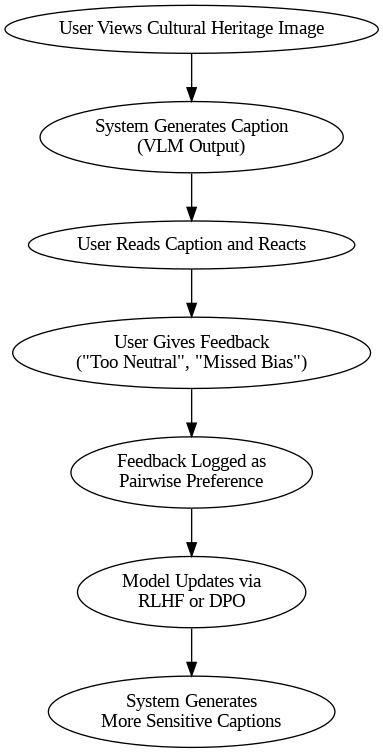

In [59]:
from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph(format='png')

dot.node('A', 'User Views Cultural Heritage Image')
dot.node('B', 'System Generates Caption\n(VLM Output)')
dot.node('C', 'User Reads Caption and Reacts')
dot.node('D', 'User Gives Feedback\n("Too Neutral", "Missed Bias")')
dot.node('E', 'Feedback Logged as\nPairwise Preference')
dot.node('F', 'Model Updates via\nRLHF or DPO')
dot.node('G', 'System Generates\nMore Sensitive Captions')


dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')
dot.edge('F', 'G')

dot.render('feedback_learning_flow', format='png')
display(Image(filename='feedback_learning_flow.png'))
